In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import numpy as np
from scipy.stats import norm

In [12]:
# fetch dataset 
air_quality = fetch_ucirepo(id=360)
# data (as pandas dataframes) 
X = air_quality.data.features 
y = air_quality.data.targets
df = pd.concat([X, y], axis=1)
print(df.head(20))

         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0   3/10/2004  18:00:00     2.6         1360       150      11.9   
1   3/10/2004  19:00:00     2.0         1292       112       9.4   
2   3/10/2004  20:00:00     2.2         1402        88       9.0   
3   3/10/2004  21:00:00     2.2         1376        80       9.2   
4   3/10/2004  22:00:00     1.6         1272        51       6.5   
5   3/10/2004  23:00:00     1.2         1197        38       4.7   
6   3/11/2004   0:00:00     1.2         1185        31       3.6   
7   3/11/2004   1:00:00     1.0         1136        31       3.3   
8   3/11/2004   2:00:00     0.9         1094        24       2.3   
9   3/11/2004   3:00:00     0.6         1010        19       1.7   
10  3/11/2004   4:00:00  -200.0         1011        14       1.3   
11  3/11/2004   5:00:00     0.7         1066         8       1.1   
12  3/11/2004   6:00:00     0.7         1052        16       1.6   
13  3/11/2004   7:00:00     1.1         1144    

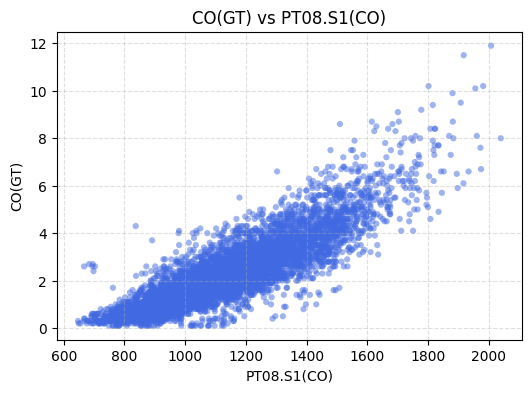

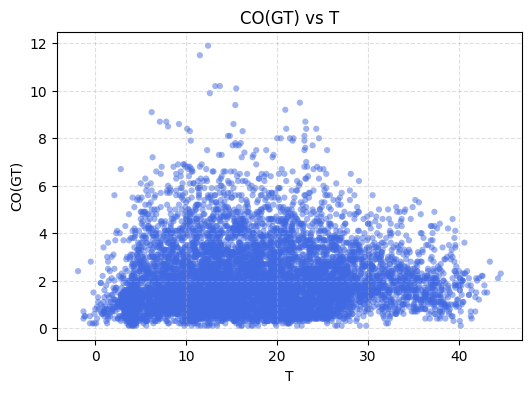

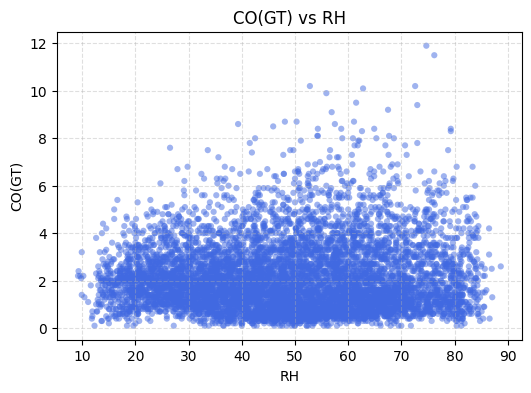

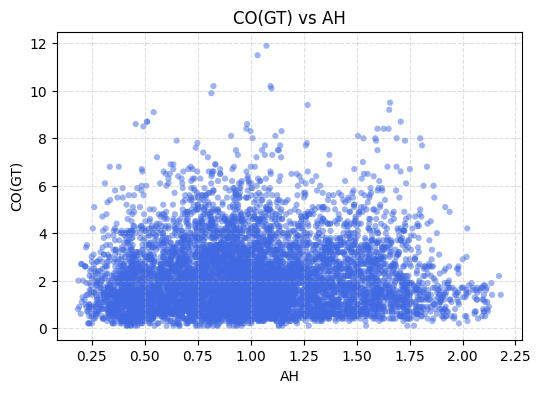

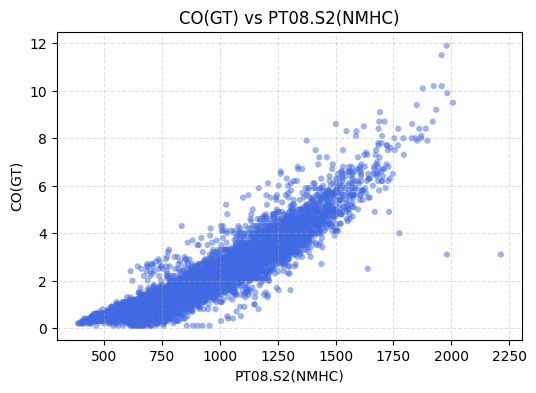

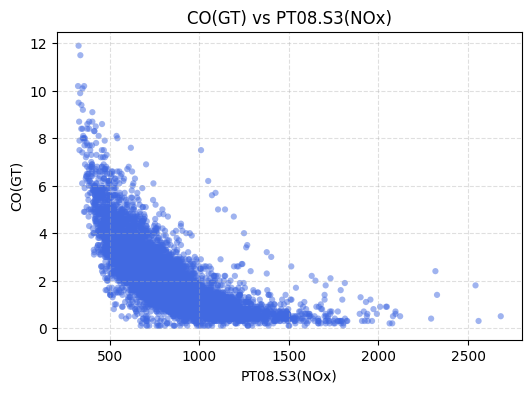

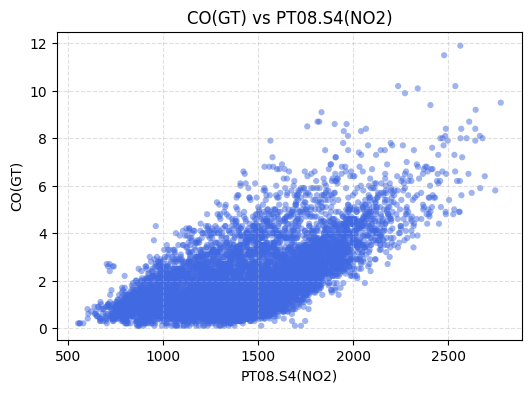

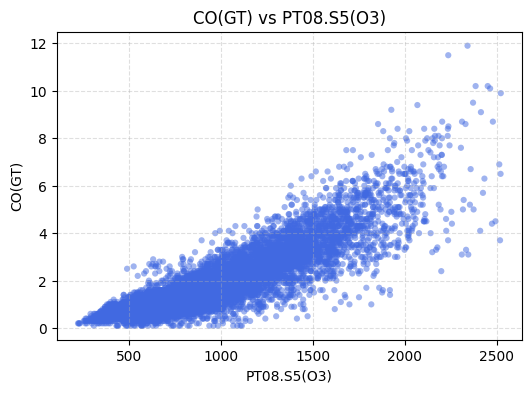

In [13]:
# non target variables vs CO(GT) plots, not plotting -200 vals
y = 'CO(GT)'
variables = [
    'PT08.S1(CO)', 'T', 'RH', 'AH',
    'PT08.S2(NMHC)', 'PT08.S3(NOx)',
    'PT08.S4(NO2)', 'PT08.S5(O3)'
]

for x in variables:
    mask = (df[x] != -200) & (df[y] != -200)
    x_clean = df.loc[mask, x]
    y_clean = df.loc[mask, y]
    plt.figure(figsize=(6, 4))
    plt.scatter(x_clean, y_clean, s=20, alpha=0.5, color='royalblue', edgecolors='none')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{y} vs {x}')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.show()

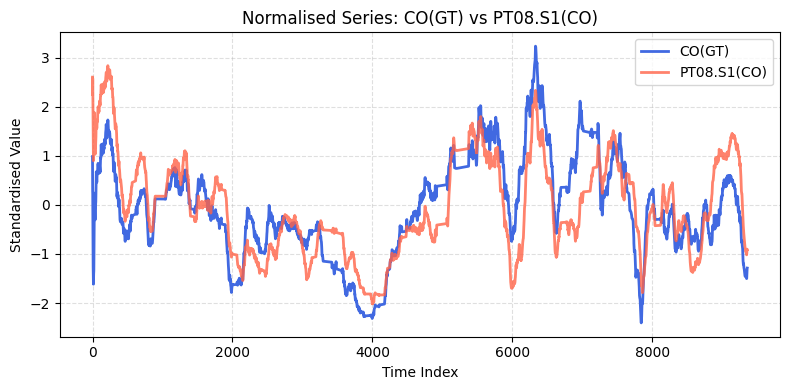

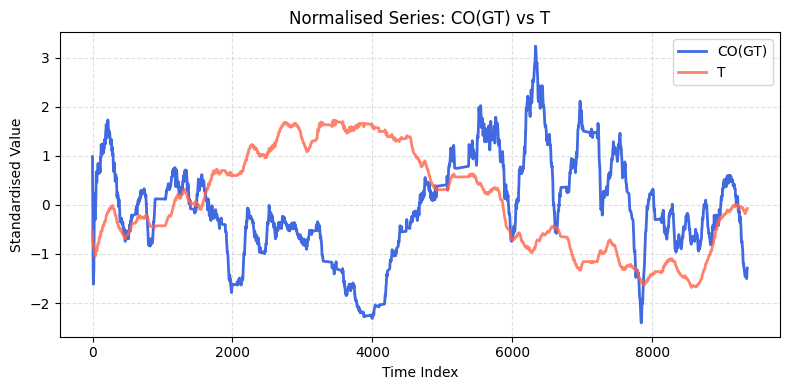

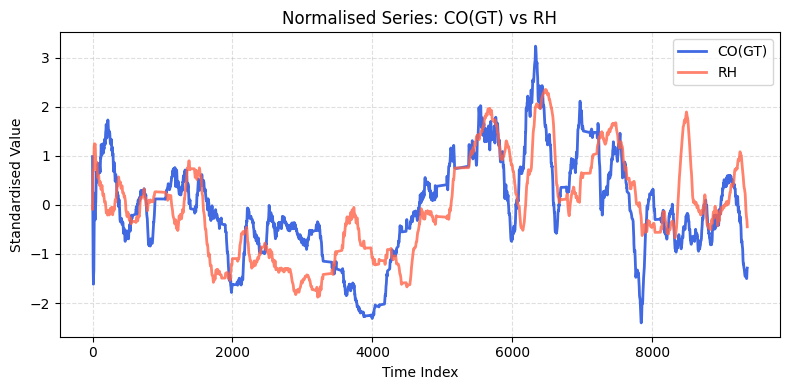

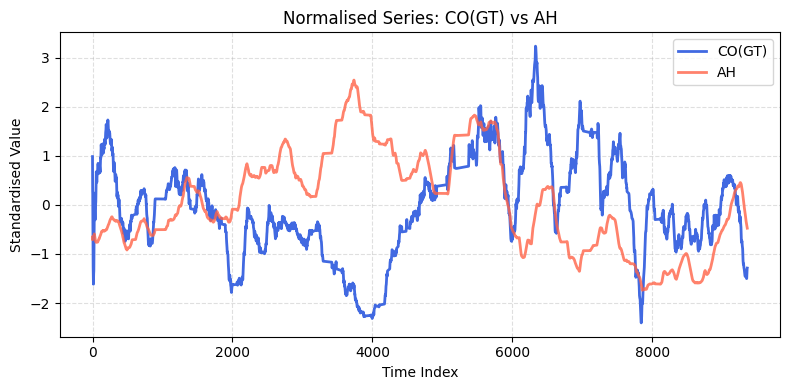

In [14]:
# time series plots: normalised moving average (weekly avg)
variables = ['PT08.S1(CO)', 'T', 'RH', 'AH']
target = 'CO(GT)'

for col in variables:
    mask = (df[target] != -200) & (df[col] != -200)
    df_clean = df.loc[mask]
    plt.figure(figsize=(8,4))

    target_smooth = df_clean[target].rolling(window=24*7, min_periods=1).mean()
    target_norm = (target_smooth - target_smooth.mean()) / target_smooth.std()

    feature_smooth = df_clean[col].rolling(window=24*7, min_periods=1).mean()
    feature_norm = (feature_smooth - feature_smooth.mean()) / feature_smooth.std()
    
    plt.plot(df_clean.index, target_norm, label=target, color='royalblue', linewidth=2)
    plt.plot(df_clean.index, feature_norm, label=col, color='tomato', linewidth=2, alpha=0.8)
    plt.title(f'Normalised Series: {target} vs {col}')
    plt.xlabel('Time Index')
    plt.ylabel('Standardised Value')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

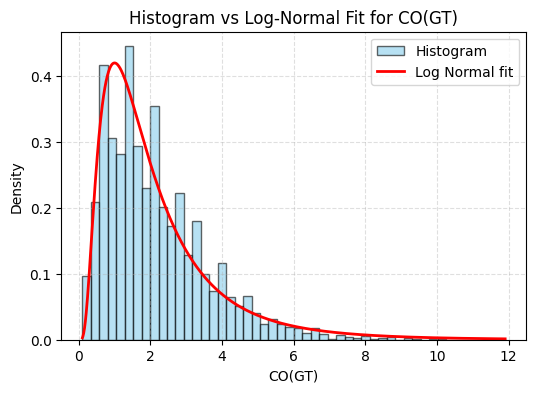

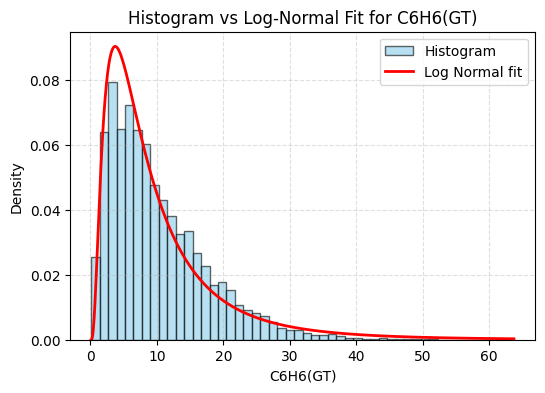

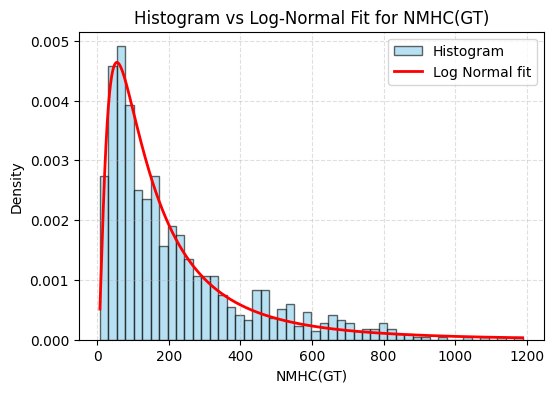

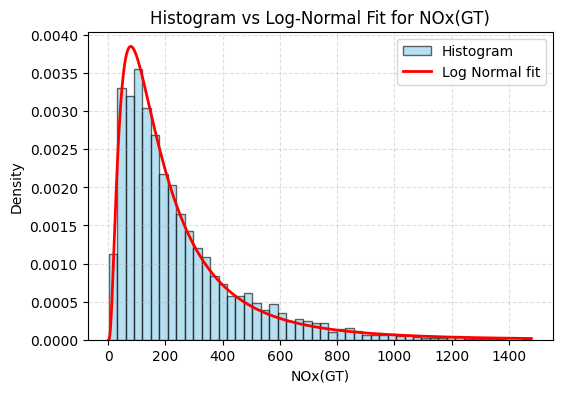

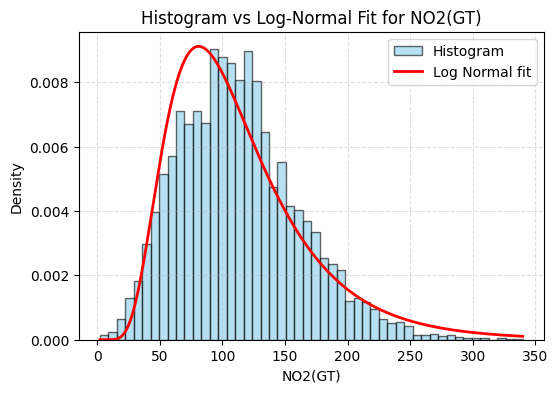

In [15]:
# distribution plots
variables = [
    'CO(GT)', 'C6H6(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)',
]

for y in variables:

    col_data = df[y]
    col_data = col_data[col_data != -200]
    data = pd.to_numeric(col_data, errors='coerce').dropna()
    shift = 0
    if data.min() <= 0:
        shift = abs(data.min()) + 1e-6
        data = data + shift
    
    
    log_data = np.log(data)
    mu, sigma = norm.fit(log_data)
    x = np.linspace(data.min(), data.max(), 1000)
    pdf = (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
    
    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=50, density=True, alpha=0.6,
             color='skyblue', edgecolor='black', label='Histogram')
    plt.plot(x, pdf, 'r', lw=2, label='Log Normal fit')
    xlabel = f"{y} (+{shift:.6f} shift)" if shift > 0 else y
    plt.xlabel(xlabel)
    plt.ylabel('Density')
    plt.title(f'Histogram vs Log-Normal Fit for {y}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.show()